# Chapter 5: Classification Problems

## 5.1 Classification Overview

## 5.3 Credit Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

credit_df = pd.read_csv( "German Credit Data.csv" )
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [2]:
credit_df.iloc[0:5,1:7]

,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,6,A34,1169,A65,A75,4
1,48,A32,5951,A61,A73,2
2,12,A34,2096,A61,A74,2
3,42,A32,7882,A61,A74,2
4,24,A33,4870,A61,A73,3


In [3]:
credit_df.iloc[0:5,7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


In [4]:
credit_df.status.value_counts()

status
0    700
1    300
Name: count, dtype: int64

In [5]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

### 5.3.1 Encoding Categorical Features

In [6]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], 
                                   drop_first = True,
                                   dtype = int)

In [7]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [8]:
encoded_credit_df[['checkin_acc_A12', 
                   'checkin_acc_A13', 
                   'checkin_acc_A14']].head(5)

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [9]:
import statsmodels.api as sm

Y = credit_df.status
X = sm.add_constant( encoded_credit_df )

### 5.3.2 Splitting into Train and Validation Sets

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

### 5.3.3 Building Logistic Regression Model

In [11]:
import statsmodels.api as sm

logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


### 5.3.4 Printing Model Summary 

In [12]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   status            AIC:               744.5132  
Date:                 2025-04-26 11:59  BIC:               881.0456  
No. Observations:     700               Log-Likelihood:    -342.26   
Df Model:             29                LL-Null:           -426.75   
Df Residuals:         670               LLR p-value:       1.0630e-21
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

### 5.3.5 Model Dignostics

In [13]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [14]:
significant_vars = get_significant_vars( logit_model )

significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [15]:
final_logit = sm.Logit( y_train, 
            sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [16]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.161     
Dependent Variable:  status           AIC:              733.8898  
Date:                2025-04-26 11:59 BIC:              774.8495  
No. Observations:    700              Log-Likelihood:   -357.94   
Df Model:            8                LL-Null:          -426.75   
Df Residuals:        691              LLR p-value:      7.4185e-26
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

### 5.3.6 Predicting on Test Data

In [17]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": final_logit.predict( 
                        sm.add_constant( X_test[significant_vars] ) ) } )    

In [18]:
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


In [19]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( 
                            lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


### 5.3.7 Creating a Confusion Matrix

In [20]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

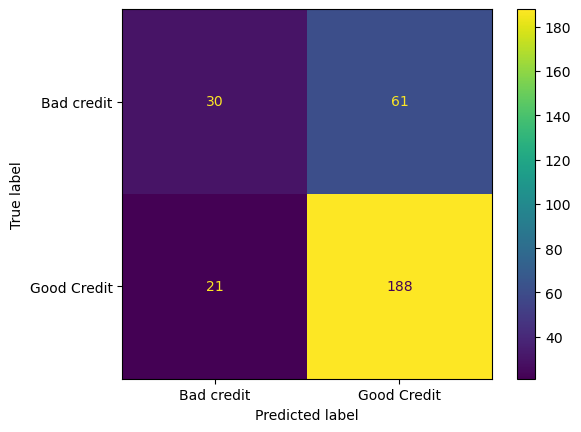

In [21]:
cm = confusion_matrix( y_pred_df.actual, y_pred_df.predicted, labels = [1,0] )
cm_plot = ConfusionMatrixDisplay(cm, display_labels = ["Bad credit", "Good Credit"])
cm_plot.plot();

### 5.3.8 Measuring Accuracies

In [22]:
from sklearn import metrics

In [23]:
print( metrics.classification_report( y_pred_df.actual, 
                                      y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



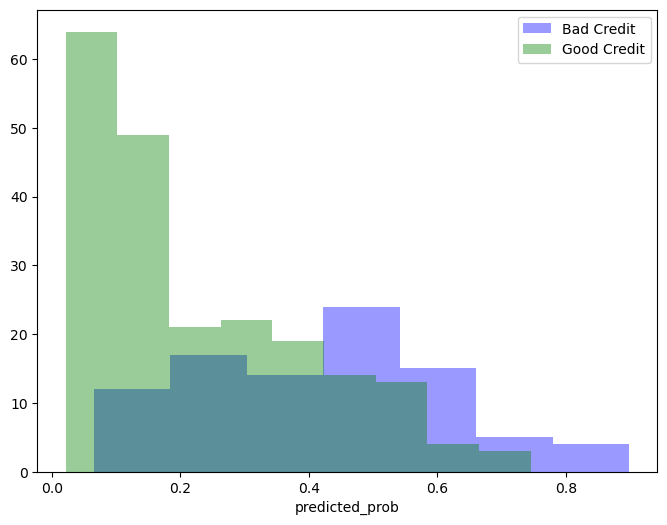

In [24]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], 
            kde=False, color = 'b', 
            label = 'Bad Credit' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], 
            kde=False, color = 'g', 
            label = 'Good Credit' )
plt.legend()
plt.show()

### 5.3.9 ROC & AUC

In [25]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, auc

def draw_roc( actual, probs ):

    # Obtain fpr and tprs for intermediate threshold values
    fpr, tpr, thresholds = roc_curve( actual, probs )        
    
    # Obtain the roc auc score
    roc_auc = auc(fpr, tpr)    
    
    rocauc_display = RocCurveDisplay(fpr=fpr, 
                                     tpr=tpr, 
                                     roc_auc=roc_auc)
    rocauc_display.plot()
    
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.show() 
    
    return fpr, tpr, thresholds

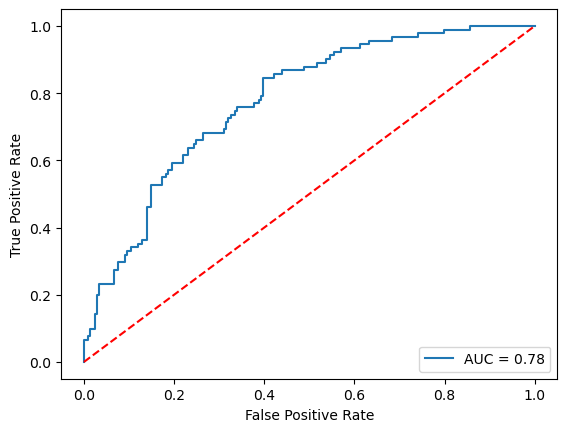

In [26]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, 
                                 y_pred_df.predicted_prob)

In [27]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score( y_pred_df.actual, 
                           y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.78

### 5.3.10 Finding Optimal Cutoff

#### 5.3.10.1 Youden's index

In [28]:
tpr_fpr = pd.DataFrame( {'tpr': tpr, 
                         'fpr': fpr, 
                         'thresholds': thresholds } )

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
68,0.846154,0.397129,0.221534,0.449025
70,0.857143,0.421053,0.207107,0.436090
72,0.868132,0.440191,0.186966,0.427940
69,0.846154,0.421053,0.208485,0.425101
60,0.758242,0.339713,0.271040,0.418529


In [29]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map( 
                                lambda x: 1 if x > 0.22 else 0)

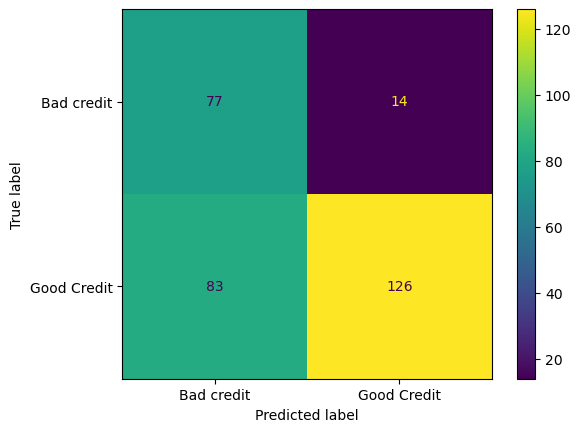

In [30]:
cm = confusion_matrix( y_pred_df.actual, y_pred_df.predicted_new, labels = [1,0] )
cm_plot = ConfusionMatrixDisplay(cm, display_labels = ["Bad credit", "Good Credit"])
cm_plot.plot();

In [31]:
print(metrics.classification_report( y_pred_df.actual, 
                                     y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       209
           1       0.48      0.85      0.61        91

    accuracy                           0.68       300
   macro avg       0.69      0.72      0.67       300
weighted avg       0.77      0.68      0.69       300



#### 5.3.10.2 Cost Based Approach

In [32]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
    cm = confusion_matrix( actual, predicted, labels = [1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

In [33]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [34]:
idx = 0

## iterate cut-off probability values between 0.1 and 0.5
for each_prob in range( 10, 50):
    cost = get_total_cost( y_pred_df.actual, 
                          y_pred_df.predicted_prob.map( 
            lambda x: 1 if x > (each_prob/100)  else 0), 1, 5 )
    cost_df.loc[idx] = [(each_prob/100), cost] 
    idx += 1

In [35]:
cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
4,0.14,150.0
12,0.22,153.0
2,0.12,154.0
10,0.20,154.0
9,0.19,156.0


In [36]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map( 
    lambda x: 1 if x > 0.14 else 0)

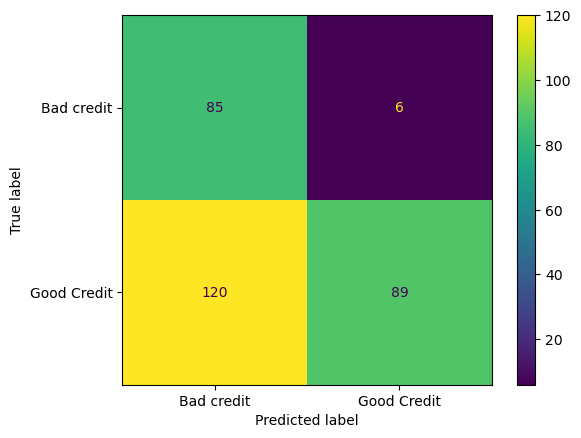

In [37]:
cm = confusion_matrix( y_pred_df.actual, y_pred_df.predicted_using_cost, labels = [1,0] )
cm_plot = ConfusionMatrixDisplay(cm, display_labels = ["Bad credit", "Good Credit"])
cm_plot.plot();

## 5.4 Gain Chart and Lift Chart

### 5.4.1 Loading and Preparing the Dataset

In [38]:
import pandas as pd
bank_df = pd.read_csv( 'bank.csv' )
bank_df.head( 5 )

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [39]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [40]:
X_features = list( bank_df.columns )
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [41]:
encoded_bank_df = pd.get_dummies( bank_df[X_features], 
                                  drop_first = True,
                                  dtype = 'int' )

In [42]:
Y = bank_df.subscribed.map( lambda x: int( x == 'yes') )
X = encoded_bank_df

#### 5.4.2 Building the Logistic Regression Model

In [43]:
logit_model = sm.Logit( Y, sm.add_constant( X ) ).fit()

Optimization terminated successfully.
         Current function value: 0.335572
         Iterations 7


In [44]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.061     
Dependent Variable:   subscribed       AIC:              3082.2384 
Date:                 2025-04-26 11:59 BIC:              3236.2341 
No. Observations:     4521             Log-Likelihood:   -1517.1   
Df Model:             23               LL-Null:          -1615.5   
Df Residuals:         4497             LLR p-value:      1.4866e-29
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -1.7573   0.3799 -4.6251 0.0000 -2.5019 -1.0126
age                  0.0078   0.0058  1.3395 0.1804 -0.0036  0.0191
balance             -0.0000   0.0000 -0.2236 0.8231 -0.0000  0.0000
current-campaign    -0.0905   0.0238 -3.8042 0.0001 -0.1371 -0.0439
previous-campaign    0.1414   0.0212  6.6569 0.0000  0.0998  0.1830
job_blue-collar     -0.3412   0.2000 -1.7060 0.0880 -0.7331  0.0508
job_entrepreneur    -0.2900   0.3161 -0.9175 0.3589 -0.9096  0.3295
job_housemaid       -0.0166   0.3339 -0.0497 0.9603 -0.6711  0.6379
job_management      -0.0487   0.1984 -0.2455 0.8061 -0.4375  0.3401
job_retired          0.5454   0.2503  2.1794 0.0293  0.0549  1.0360
job_self-employed   -0.2234   0.2895 -0.7715 0.4404 -0.7909  0.3441
job_services        -0.2248   0.2245 -1.0012 0.3167 -0.6648  0.2152
job_student          0.3888   0.3181  1.2223 0.2216 -0.2346  1.0122
job_technician      -0.2101   0.1874 -1.1213 0.2622 -0.5773  0.1571
job_unemployed      -0.3723   0.3336 -1.1162 0.2643 -1.0261  0.2815
job_unknown          0.3193   0.4620  0.6913 0.4894 -0.5861  1.2248
marital_married     -0.4012   0.1440 -2.7857 0.0053 -0.6835 -0.1189
marital_single      -0.0463   0.1676 -0.2763 0.7823 -0.3749  0.2822
education_secondary  0.2128   0.1680  1.2670 0.2052 -0.1164  0.5420
education_tertiary   0.3891   0.1935  2.0103 0.0444  0.0098  0.7684
education_unknown   -0.1956   0.2927 -0.6682 0.5040 -0.7693  0.3781
default_yes          0.2286   0.3670  0.6228 0.5334 -0.4908  0.9479
housing-loan_yes    -0.5355   0.1024 -5.2273 0.0000 -0.7362 -0.3347
personal-loan_yes   -0.7139   0.1689 -4.2268 0.0000 -1.0449 -0.3829
===================================================================

"""

In [45]:
significant_vars = get_significant_vars( logit_model )

significant_vars

['const',
 'current-campaign',
 'previous-campaign',
 'job_retired',
 'marital_married',
 'education_tertiary',
 'housing-loan_yes',
 'personal-loan_yes']

In [46]:
X_features = ['current-campaign', 
              'previous-campaign', 
              'job_retired', 
              'marital_married', 
              'education_tertiary', 
              'housing-loan_yes', 
              'personal-loan_yes']

In [47]:
logit_model_2 = sm.Logit( Y, sm.add_constant( X[X_features] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.337228
         Iterations 7


In [48]:
logit_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.056     
Dependent Variable:   subscribed       AIC:              3065.2182 
Date:                 2025-04-26 11:59 BIC:              3116.5501 
No. Observations:     4521             Log-Likelihood:   -1524.6   
Df Model:             7                LL-Null:          -1615.5   
Df Residuals:         4513             LLR p-value:      8.1892e-36
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -1.4754   0.1133 -13.0260 0.0000 -1.6974 -1.2534
current-campaign   -0.0893   0.0236  -3.7925 0.0001 -0.1355 -0.0432
previous-campaign   0.1419   0.0211   6.7097 0.0000  0.1004  0.1833
job_retired         0.8246   0.1731   4.7628 0.0000  0.4853  1.1639
marital_married    -0.3767   0.0969  -3.8878 0.0001 -0.5667 -0.1868
education_tertiary  0.2991   0.1014   2.9500 0.0032  0.1004  0.4978
housing-loan_yes   -0.5834   0.0986  -5.9179 0.0000 -0.7767 -0.3902
personal-loan_yes  -0.7025   0.1672  -4.2012 0.0000 -1.0302 -0.3748
===================================================================

"""

In [49]:
y_pred_df = pd.DataFrame( { 'actual': Y, 
                            'predicted_prob': logit_model_2.predict( 
                            sm.add_constant( X[X_features] ) ) } )

In [50]:
sorted_predict_df = y_pred_df[['predicted_prob', 
                               'actual']].sort_values( 'predicted_prob', 
                                                    ascending = False )

In [51]:
num_per_decile = int( len( sorted_predict_df ) / 10 )
print( "Number of observations per decile: ", num_per_decile)

Number of observations per decile:  452


In [52]:
def get_deciles( df ):
    df['decile'] = 1

    idx = 0

    for each_d in range( 0, 10 ):
        df.iloc[idx:idx+num_per_decile, df.columns.get_loc('decile')] = each_d 
        idx += num_per_decile

    df['decile'] = df['decile'] + 1    
    
    return df

In [53]:
deciles_predict_df = get_deciles( sorted_predict_df )

In [54]:
deciles_predict_df[0:10]

,predicted_prob,actual,decile
3682,0.864769,0,1
97,0.828031,0,1
3426,0.706809,0,1
1312,0.642337,1,1
3930,0.631032,1,1
4397,0.619146,0,1
2070,0.609129,0,1
3023,0.573199,0,1
4080,0.572364,0,1
804,0.559350,0,1


In [55]:
gain_lift_df = pd.DataFrame( 
    deciles_predict_df.groupby( 
            'decile')['actual'].sum() ).reset_index()
gain_lift_df.columns = ['decile', 'gain']

In [56]:
gain_lift_df['gain_percentage'] = (100 * 
            gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())

In [57]:
gain_lift_df

,decile,gain,gain_percentage
0,1,125,23.992322
1,2,83,39.923225
2,3,73,53.934741
3,4,53,64.107486
4,5,31,70.057582
5,6,46,78.886756
6,7,37,85.988484
7,8,28,91.362764
8,9,25,96.161228
9,10,20,100.000000


In [58]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

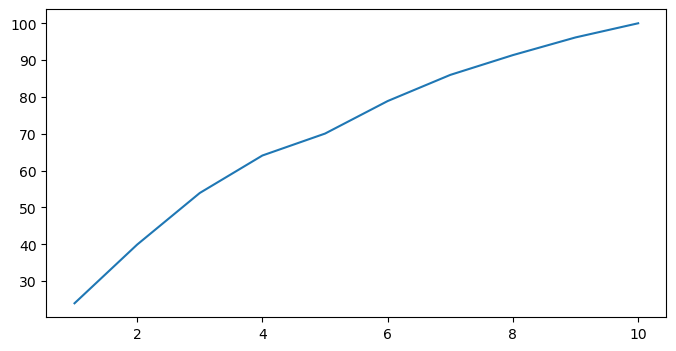

In [59]:
plt.figure( figsize = (8,4))
plt.plot( gain_lift_df['decile'], 
         gain_lift_df['gain_percentage'], '-' )

plt.show()

#### Calculating Lift 

In [60]:
gain_lift_df['lift'] = ( gain_lift_df.gain_percentage 
                        / ( gain_lift_df.decile * 10) )

In [61]:
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,125,23.992322,2.399232
1,2,83,39.923225,1.996161
2,3,73,53.934741,1.797825
3,4,53,64.107486,1.602687
4,5,31,70.057582,1.401152
5,6,46,78.886756,1.314779
6,7,37,85.988484,1.228407
7,8,28,91.362764,1.142035
8,9,25,96.161228,1.068458
9,10,20,100.000000,1.000000


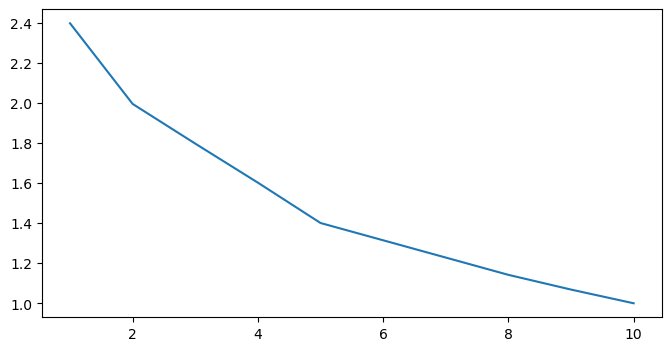

In [62]:
plt.figure( figsize = (8,4))
plt.plot( gain_lift_df['decile'], gain_lift_df['lift'], '-' )
plt.show()

## 5.5 Decision Trees

### 5.5.1 Split the dataset

In [63]:
Y = credit_df.status
X = encoded_credit_df

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, Y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

### 5.5.2 Building Decision Tree classifier using Gini Criteria

In [64]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion = 'gini', 
                                  max_depth = 3 )

In [65]:
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=3)

### 5.5.3 Measuring Test Accuracy

In [66]:
tree_predict = clf_tree.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict )

0.5835743204164258

### 5.5.4 Displaying the Tree

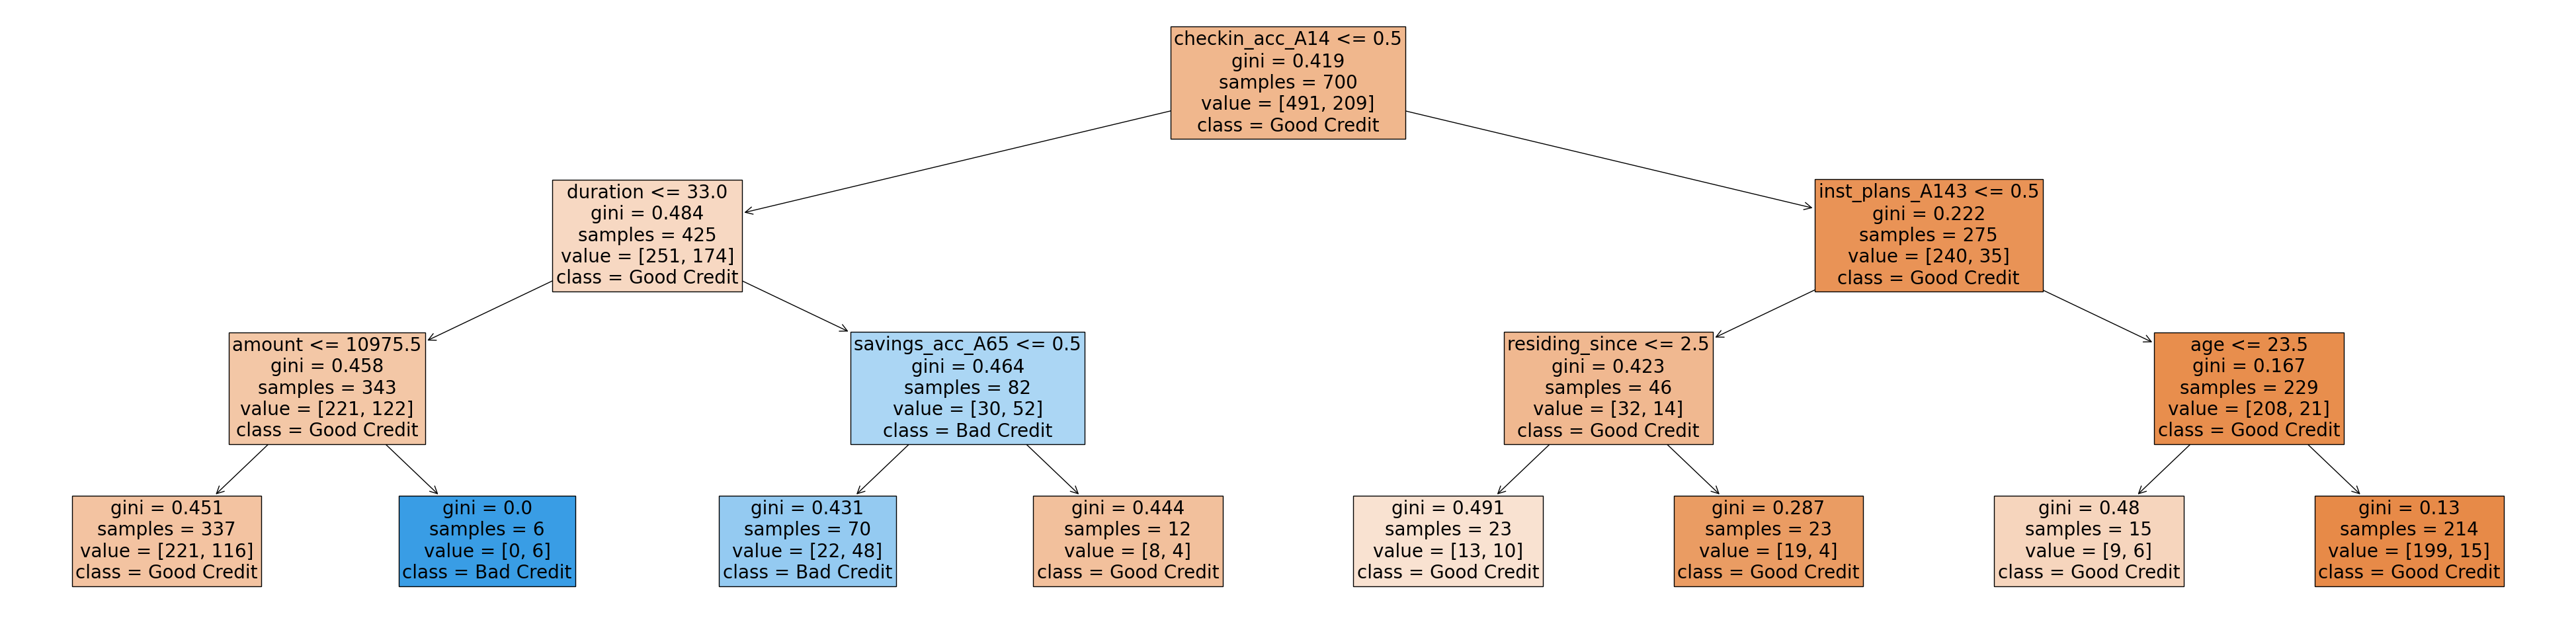

In [67]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50, 12))
# Export the tree into odt file
plot_tree(clf_tree,
          feature_names = X_train.columns,
          class_names= ['Good Credit', 'Bad Credit'],  
          filled = True,
          fontsize = 20);

### 5.5.5 Understanding Gini Impurity

In [68]:
gini_node_1 = 1 - pow(491/700, 2) - pow (209/700, 2)
print( round( gini_node_1, 4) )

0.4189


In [69]:
X_test.shape

(300, 29)

### 5.5.6 Building Decision Tree using Entropy Criteria

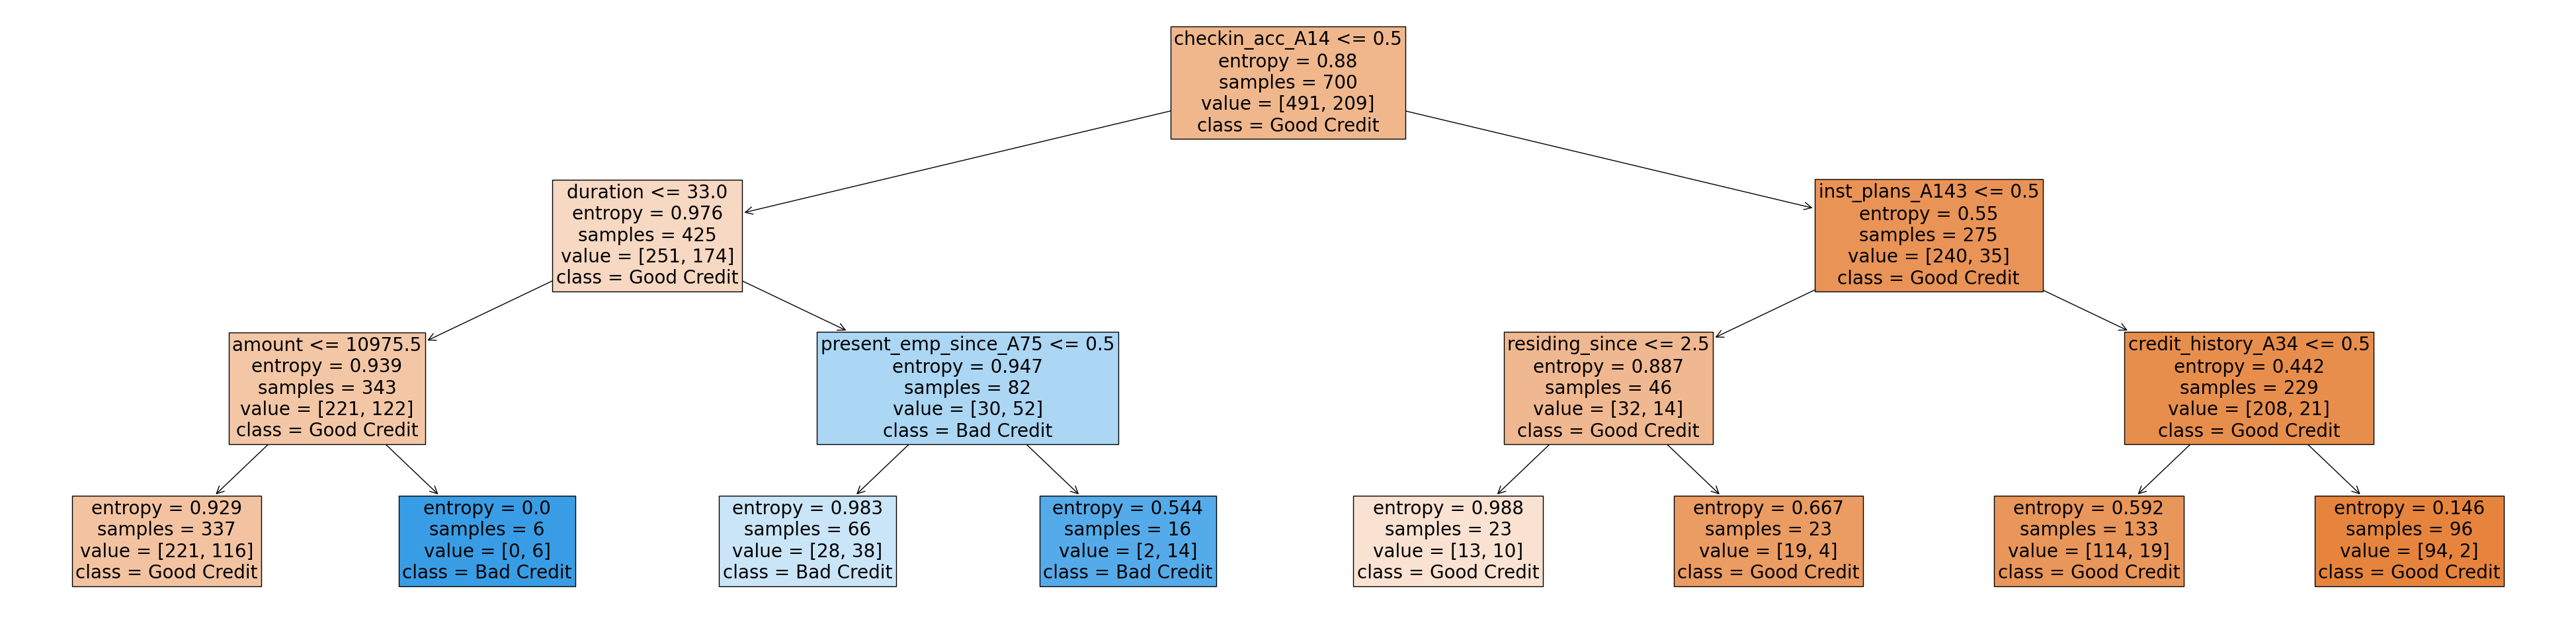

In [70]:
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy', 
                                          max_depth = 3 )
clf_tree_entropy.fit( X_train, y_train )

plt.figure(figsize = (50, 12))
# Export the tree into odt file
plot_tree(clf_tree_entropy,
          feature_names = X_train.columns,
          class_names= ['Good Credit', 'Bad Credit'],  
          filled = True,
          fontsize = 20);

#### Calculating entropy impurity

In [71]:
import math

entropy_node_1 = - (491/700) * math.log2(491/700) - (209/700) * math.log2(209/700)
print( round( entropy_node_1, 2) )

0.88


#### Measuring test accuracy

In [72]:
tree_predict = clf_tree_entropy.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict )

0.5763972869236027

### 5.5.7 Finding optimal criteria and max_depth

In [73]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini','entropy'], 
                     'max_depth': range(4,10)}]


clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree,
                 tuned_parameters,
                 cv=10,
                 scoring='roc_auc')

clf.fit(X_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(4, 10)}],
             scoring='roc_auc')

In [74]:
np.round(clf.best_score_, 3)

0.683

In [75]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}